# Индивидуално поведение и агрегация

## Оптимално потребление

Една стандартна микроикономическа задача е тази за максимизиране на полезността от потреблението на две стоки, количествата от които са означени с $x_1$ и $x_2$, при ограничение зададен бюджет (доход). 

Популярна функционална форма за функцията на полезност:

$$U(x_1,x_2) = x_1^\alpha x_2^\beta, \qquad \alpha,\beta \in (0,1)$$

Бюджетно ограничение:

$$p_1x_1+p_2x_2 = I, \qquad p_1,p_2,I > 0$$

Решението на тази задача има следната форма:

$$x^*_1 = \frac{\alpha}{\alpha+\beta}\frac{ I}{p_1}, \qquad x^*_2 = \frac{\beta}{\alpha+\beta}\frac{ I}{p_2}$$

В специалния случай, когато $\beta=1-\alpha$, имаме
$$x^*_1 =\alpha\frac{ I}{p_1}, \qquad x^*_2 = (1-\alpha)\frac{ I}{p_2}$$

## Задача 1

Напишете функции за специалния случай $\beta=1-\alpha$, които изчисляват търсенето на двете стоки в зависимост от цени, доход и коефициента $\alpha$. Използвайте сигнатурите `x₁(p₁,α,I)` и `x₂(p₂,α,I)`.

In [4]:
x₁(p₁,α,I) = α*I/p₁
x₂(p₂,α,I) = (1-α)*I/p₂

println(x₁(1.0,0.6,100))
println(x₂(2.0,0.6,100))

60.0
20.0


## Графики в Julia

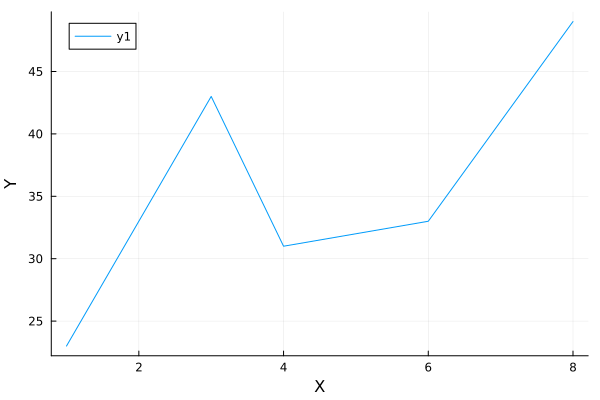

In [6]:
using Plots

x = [1,3,4,6,8]
y = [23,43,31,33,49]

plot(x,y, xlabel = "X", ylabel = "Y")
# plot(x,y, xlabel = "X", ylabel = "Y", legend = false, title = "My plot")

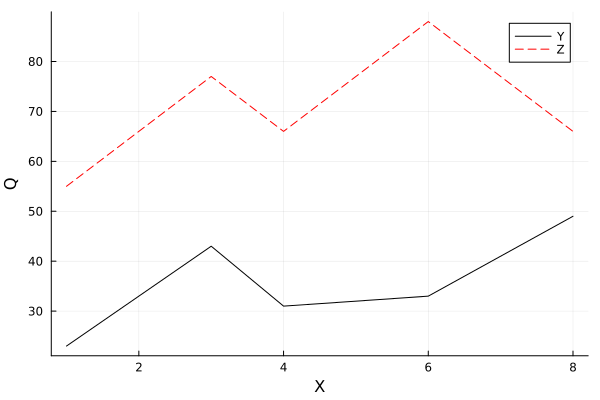

In [7]:
x = [1,3,4,6,8]
y = [23,43,31,33,49]

plot(x,y, xlabel = "X", ylabel = "Q", label="Y",color=:black)

z = [55,77,66,88,66]
plot!(x,z, label="Z", color=:red, linestyle=:dash)

## Задача 2

- Обобщете дефинициите на `x₁(p₁,α,I)` и `x₂(p₂,α,I)`, така че да работят с вектори `p₁` и `p₂` вместо със скалари.
- Генерирайте графики за функциите на търсене при $\alpha=0.6$ и $I=100$ за диапазон на двете цени от 0.01 до 2.0 със стъпка 0.01. 

In [9]:
x₁(p₁,α,I) = α*I./p₁
x₂(p₂,α,I) = (1-α)*I./p₂

α = 0.6
I = 100
p₁ = p₂ = 0.01:.01:2;

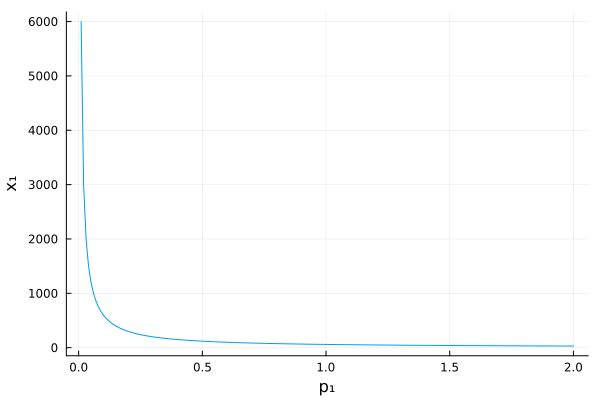

In [10]:
plot(p₁,x₁(p₁,α,I), xlabel = "p₁", ylabel="x₁", legend=false)

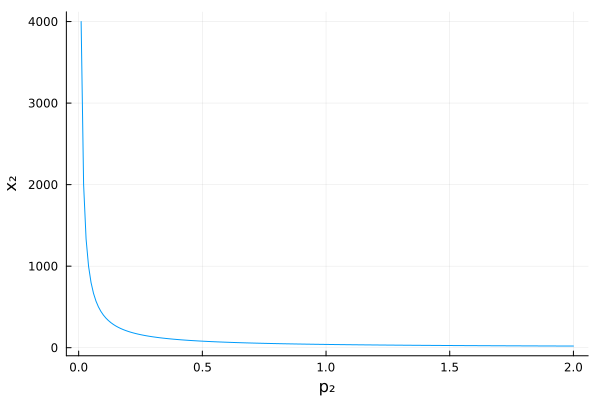

In [11]:
plot(p₂,x₂(p₂,α,I), xlabel = "p₂", ylabel="x₂", legend=false)

## Задача 3

Нека разгледаме популация от домакинства, които се различават по доходите си. Характеристиките на популацията са зададени в следната таблица:
|Брой домакинства | Доход |
|-----------------|-------|
| 200             | 100   |
| 500             | 200   |
| 450             | 500   |
| 100             | 700   |


Генерирайте графика, илюстрираща разпределението на доходите от горната таблица. Използвайте функцията `bar` вместо `plot`.

In [13]:
incomes = [100, 200, 500, 700]
income_counts = [200, 500, 450, 100];

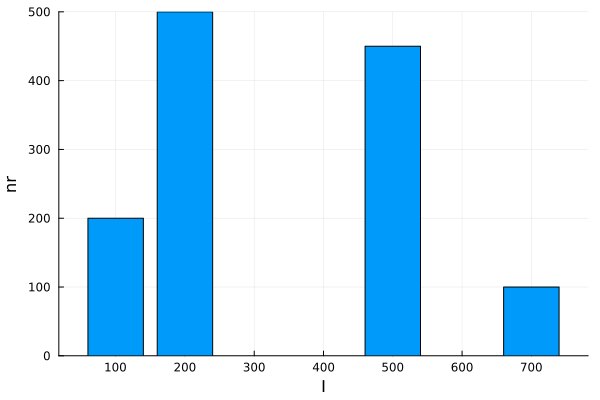

In [14]:
bar(incomes, income_counts, legend=false, xlabel="I", ylabel="nr")

## Задача 4

- На основата на функциите от [Задача 2](#Задача-2) и данните от таблицата по-горе, изчислете сумарното търсене за стоки 1 и 2, като отново използвате стойност $\alpha = 0.6$ и горните диапазони за цените.
- Генерирайте графики, които илюстрират пазарните функции на търсене.

In [16]:
X1agg = sum([x₁(p₁,α,I)*n for (I,n) in zip(incomes, income_counts)]);

In [17]:
X2agg = sum([x₂(p₂,α,I)*n for (I,n) in zip(incomes, income_counts)]);

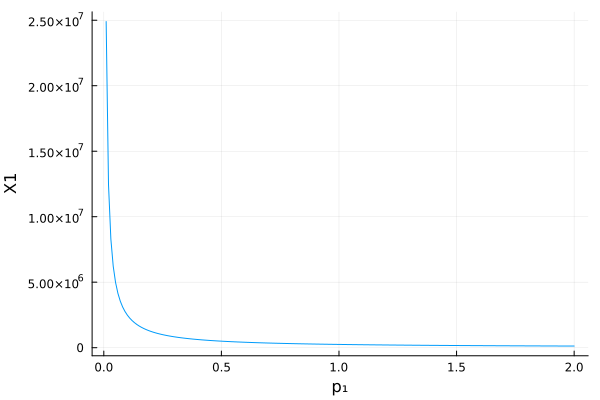

In [18]:
plot(p₁,X1agg, xlabel = "p₁", ylabel = "X1", legend=false)

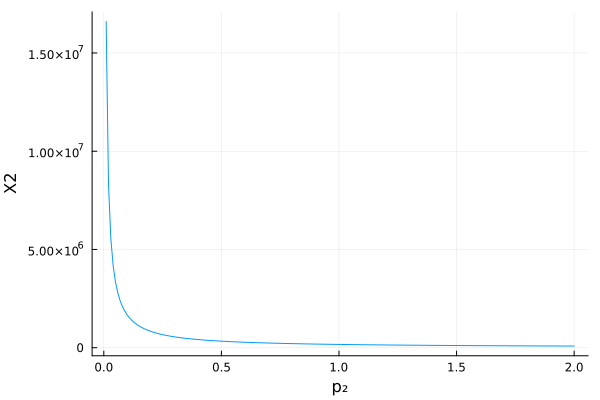

In [19]:
plot(p₂,X2agg, xlabel = "p₂", ylabel = "X2", legend=false)

## Задача 5

Изчислете среден доход за дадената популация. 

In [21]:
total_pop = sum(income_counts)
avg_I = incomes' * income_counts / total_pop

332.0

## Задача 6

Нека разгледаме случая на популация, която има същия общ брой индивиди както горната, но всички индивиди имат един и същи доход, равен на средния доход от [Задача 5](#Задача-5). 
- Изчислете сумарното търсене за стоки 1 и 2 за този случай.
- Генерирайте графики, които сравняват това пазарно търсене с полученото в [Задача 4](#Задача-4).

In [23]:
X1agg_avgI = x₁(p₁,α,avg_I)*total_pop;
X2agg_avgI = x₂(p₂,α,avg_I)*total_pop;

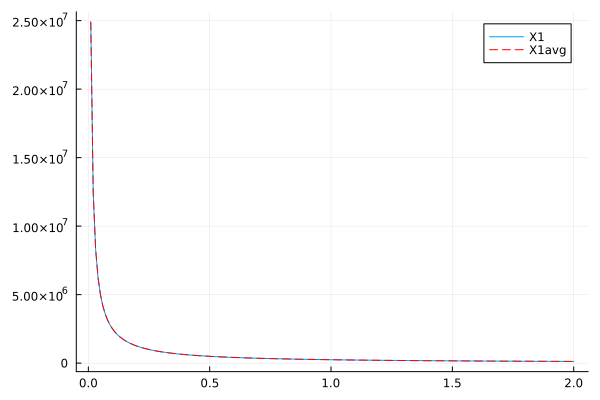

In [24]:
plot(p₁,X1agg, label = "X1")
plot!(p₁,X1agg_avgI,color=:red, linestyle = :dash, label = "X1avg")

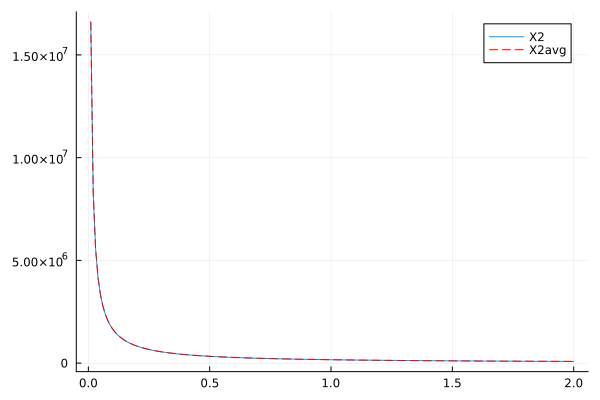

In [25]:
plot(p₂,X2agg, label = "X2")
plot!(p₂,X2agg_avgI,color=:red, linestyle = :dash, label = "X2avg")

## Задача 7

Предложете и тествайте варианти за числено сравнение на резултатите за функциите на пазарно търсене за популацията от [Задача 4](#Задача-4) и популацията с представителен потребител от [Задача 6](#Задача-6).

In [27]:
println(maximum(X1agg - X1agg_avgI))
println(minimum(X1agg - X1agg_avgI))

9.313225746154785e-10
-4.656612873077393e-10


In [28]:
import LinearAlgebra as LA
LA.norm(X1agg - X1agg_avgI)

1.5402361919596883e-9

In [29]:
println(X1agg == X1agg_avgI) # !!!!! 
println(X1agg ≈ X1agg_avgI) # \approx-<TAB>

false
true
